 📚Import Libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

📂 Load Data

In [3]:
data=pd.read_csv("House Price Prediction Dataset.csv")
data

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056
...,...,...,...,...,...,...,...,...,...,...
1995,1996,4994,5,4,3,1923,Suburban,Poor,No,295620
1996,1997,3046,5,2,1,2019,Suburban,Poor,Yes,580929
1997,1998,1062,5,1,2,1903,Rural,Poor,No,476925
1998,1999,4062,3,1,2,1936,Urban,Excellent,Yes,161119


📊 Analyze Data

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [5]:
data.isnull().sum()

Id           0
Area         0
Bedrooms     0
Bathrooms    0
Floors       0
YearBuilt    0
Location     0
Condition    0
Garage       0
Price        0
dtype: int64

In [6]:
data.columns

Index(['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt',
       'Location', 'Condition', 'Garage', 'Price'],
      dtype='object')

In [7]:
data.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


In [8]:
#📊 Dataset Summary Insights<br>
print("""
Dataset Summary Insights:
Id ranges from 1 to 2000, uniquely identifying each house.
Area varies between 501 sq.ft and 4999 sq.ft, with an average of around 2786 sq.ft.
Bedrooms range from 1 to 5, with the median being 3 bedrooms.
Bathrooms range from 1 to 4, with the median being 3 bathrooms.
Floors are between 1 and 3, with most houses having 2 floors.
YearBuilt ranges from 1900 to 2023, median year around 1961.
Price spans from $50,005 to $999,656, with an average price near $537,677.
The interquartile range for price is $300,098 (25th percentile) to $780,086 (75th percentile).
Overall, the dataset is balanced in terms of property features, with no missing values.
""")



Dataset Summary Insights:
Id ranges from 1 to 2000, uniquely identifying each house.
Area varies between 501 sq.ft and 4999 sq.ft, with an average of around 2786 sq.ft.
Bedrooms range from 1 to 5, with the median being 3 bedrooms.
Bathrooms range from 1 to 4, with the median being 3 bathrooms.
Floors are between 1 and 3, with most houses having 2 floors.
YearBuilt ranges from 1900 to 2023, median year around 1961.
Price spans from $50,005 to $999,656, with an average price near $537,677.
The interquartile range for price is $300,098 (25th percentile) to $780,086 (75th percentile).
Overall, the dataset is balanced in terms of property features, with no missing values.



🔢 Scaling Numeric Features <br>
StandardScaler applied to numeric columns (Area, Bedrooms, Bathrooms, Floors,YearBuilt, Price)

In [13]:
numeric_cols = ['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])
data.head()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1,-1.101471,1.401791,1.305568,1.244151,0.238155,149919,False,False,False,False,False,False,False
1,2,1.147485,1.401791,1.305568,1.244151,-0.095942,424998,False,False,False,False,False,False,False
2,3,0.622317,-0.704581,-0.498326,1.244151,-0.652770,266746,False,False,False,False,True,False,False
3,4,-1.405759,0.699667,-0.498326,0.008035,-1.655061,244020,False,True,False,True,False,False,True
4,5,1.652574,-1.406705,1.305568,0.008035,0.377363,636056,False,False,False,True,False,False,True


🔢 Encoding Categorical Features

In [37]:
# Check what columns are available
print("Columns in dataset:")
print(data.columns.tolist())

# Automatically detect categorical columns (object or string type)
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()
print("\nDetected categorical columns:", categorical_cols)

# Apply one-hot encoding only to categorical columns
data_encoded = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

print("\nEncoding complete. New shape:", data_encoded.shape)
data_encoded.head()


Columns in dataset:
['Id', 'Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt', 'Price', 'Location_Rural', 'Location_Suburban', 'Location_Urban', 'Condition_Fair', 'Condition_Good', 'Condition_Poor', 'Garage_Yes']

Detected categorical columns: []

Encoding complete. New shape: (2000, 14)


,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price,Location_Rural,Location_Suburban,Location_Urban,Condition_Fair,Condition_Good,Condition_Poor,Garage_Yes
0,1,-1.101471,1.401791,1.305568,1.244151,0.238155,149919,False,False,False,False,False,False,False
1,2,1.147485,1.401791,1.305568,1.244151,-0.095942,424998,False,False,False,False,False,False,False
2,3,0.622317,-0.704581,-0.498326,1.244151,-0.652770,266746,False,False,False,False,True,False,False
3,4,-1.405759,0.699667,-0.498326,0.008035,-1.655061,244020,False,True,False,True,False,False,True
4,5,1.652574,-1.406705,1.305568,0.008035,0.377363,636056,False,False,False,True,False,False,True


📊 Price Distribution: Shows the spread and skewness of house prices.

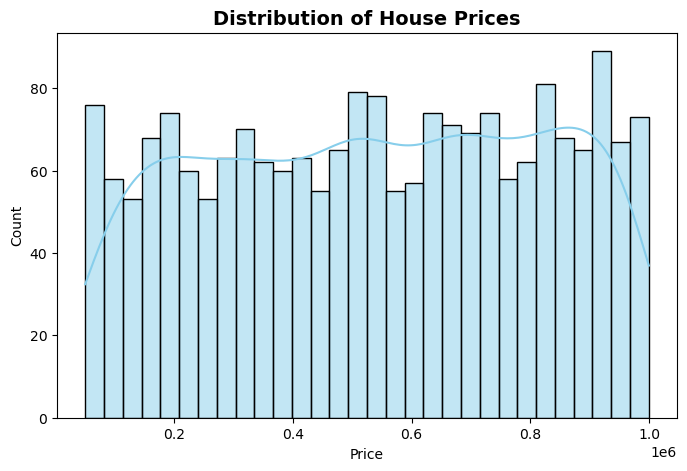

In [16]:
# 1. Price distribution
plt.figure(figsize=(8,5))
sns.histplot(data['Price'], kde=True, color='skyblue', bins=30)
plt.title("Distribution of House Prices", fontsize=14, weight='bold')
plt.show()

🛏 Bedrooms vs Price: Highlights how the number of bedrooms influences house prices.

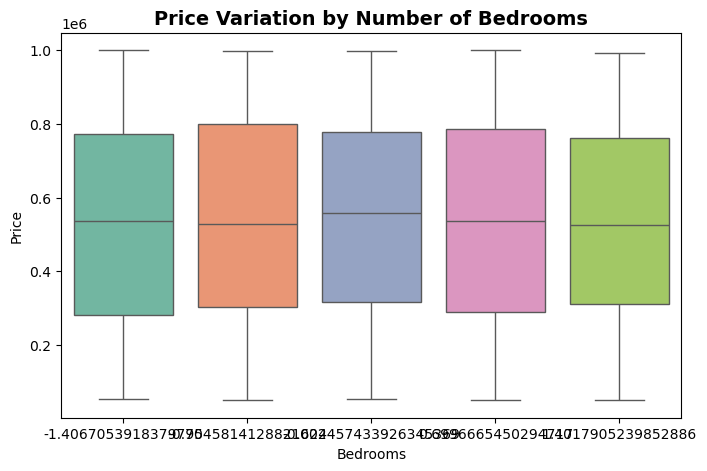

In [21]:
# 2. Bedrooms vs Price
plt.figure(figsize=(8,5))
sns.boxplot(x='Bedrooms', y='Price', hue='Bedrooms', data=data, palette='Set2', legend=False)
plt.title("Price Variation by Number of Bedrooms", fontsize=14, weight='bold')
plt.show()


📐 Area vs Price: Examines the relationship between house size and price.

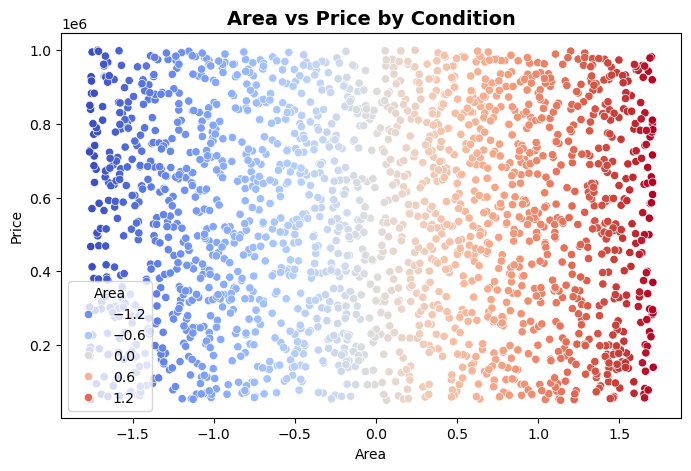

In [23]:
# 3. Area vs Price
plt.figure(figsize=(8,5))
sns.scatterplot(x='Area', y='Price', hue='Area',  data=data, palette='coolwarm')
plt.title("Area vs Price by Condition", fontsize=14, weight='bold')
plt.show()

🔗 Correlation Heatmap: Reveals relationships between numeric variables.

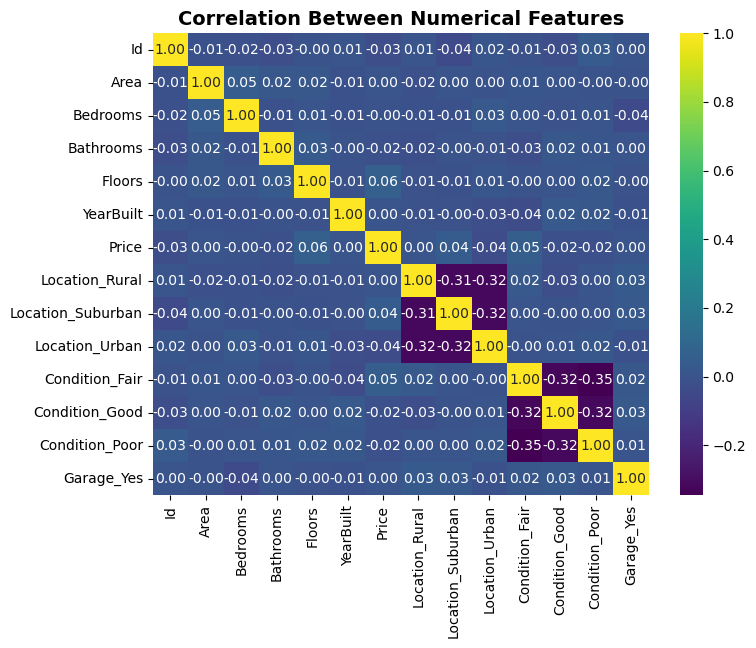

In [24]:
# 4. Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(numeric_only=True), annot=True, cmap='viridis', fmt=".2f")
plt.title("Correlation Between Numerical Features", fontsize=14, weight='bold')
plt.show()

📊 Linear Regression Model — House Price Prediction

In [26]:
from sklearn.ensemble import RandomForestRegressor
# Select features and target
X = data[['Area', 'Bedrooms', 'Bathrooms', 'Floors', 'YearBuilt']]
y = data['Price']

# Split data into train & test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model=LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

Scatter plot: Actual vs Predicted Price

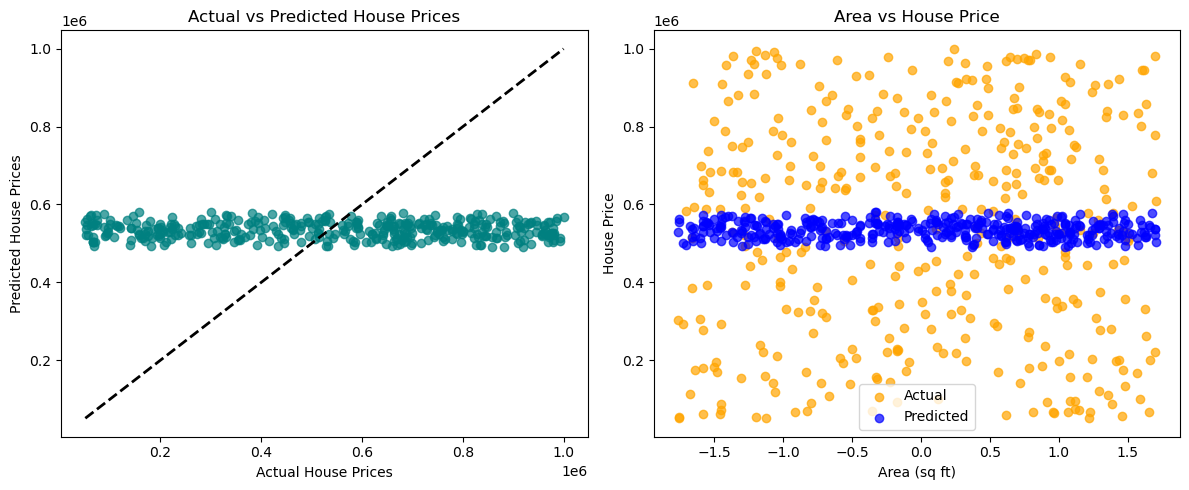

In [28]:
# Scatter plot: Actual vs Predicted Price
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.7, color='teal')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual House Prices')
plt.ylabel('Predicted House Prices')
plt.title('Actual vs Predicted House Prices')

# Scatter plot: Area vs Price (Actual & Predicted)
plt.subplot(1, 2, 2)
plt.scatter(X_test['Area'], y_test, label='Actual', alpha=0.7, color='orange')
plt.scatter(X_test['Area'], y_pred, label='Predicted', alpha=0.7, color='blue')
plt.xlabel('Area (sq ft)')
plt.ylabel('House Price')
plt.title('Area vs House Price')
plt.legend()

plt.tight_layout()
plt.show()


Model Evaluation Metrics: MSE, RMSE, MAE, and R-squared

In [38]:
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared: {r2}')

Mean Squared Error (MSE): 78789724000.88458
Root Mean Squared Error (RMSE): 280695.0729900412
Mean Absolute Error (MAE): 244587.1999197856
R-squared: -0.01273663755401877


Features Importance

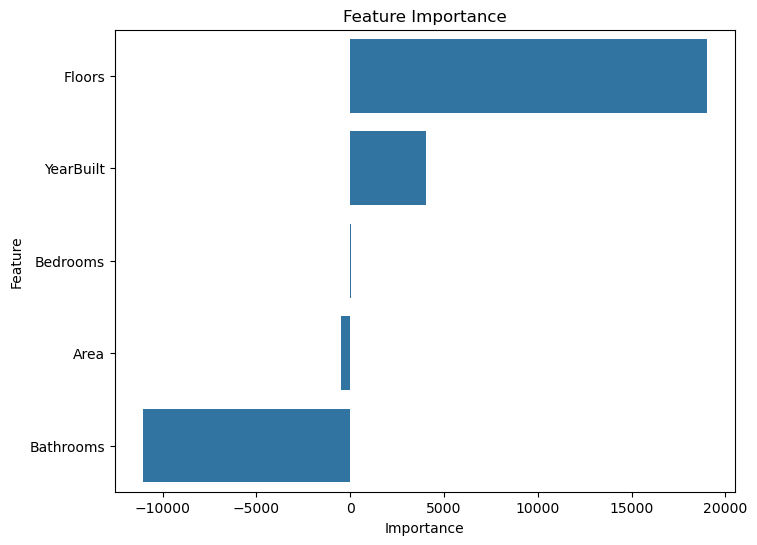

In [30]:
feature_names = X.columns
importance = model.feature_importances_ if hasattr(model, 'feature_importances_') else model.coef_

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title('Feature Importance')
plt.show()


Predicted House Price Function Using Area, Bedrooms, Bathrooms, Floors, and YearBuilt

"Interactive House Price Prediction — Enter Property Details to Estimate Price"

In [36]:
from datetime import datetime
import pandas as pd

def predict_house_price(area, bedrooms, bathrooms, floors, year_built):
    current_year = datetime.now().year
    house_age = current_year - year_built
    
    # Prepare input features in the same order your model expects
    input_features = pd.DataFrame({
        'Area': [area],
        'Bedrooms': [bedrooms],
        'Bathrooms': [bathrooms],
        'Floors': [floors],
        'YearBuilt': [year_built]
    })
    
    # Scale numeric features (make sure scaler was fitted on these columns)
    input_features_scaled = scaler.transform(input_features)
    
    # Predict price
    predicted_price = model.predict(input_features_scaled)
    return predicted_price[0]


# ---- Take user input ----
print("🏠 House Price Prediction")
print("-" * 40)

area = float(input("Enter area (in sq.ft): "))
bedrooms = int(input("Enter number of bedrooms: "))
bathrooms = int(input("Enter number of bathrooms: "))
floors = int(input("Enter number of floors: "))
year_built = int(input("Enter year built: "))

# ---- Predict and show result ----
predicted_price = predict_house_price(area, bedrooms, bathrooms, floors, year_built)

print(f"\nPredicted House Price for:")
print(f"🧱 {area} sq.ft | 🛏️ {bedrooms} BHK | 🛁 {bathrooms} Bath | 🏢 {floors} Floor(s) | Built in {year_built}")
print(f"💰 Estimated Price: ${predicted_price:,.2f}")


🏠 House Price Prediction
----------------------------------------


Enter area (in sq.ft):  3500
Enter number of bedrooms:  4
Enter number of bathrooms:  3
Enter number of floors:  1
Enter year built:  2004



Predicted House Price for:
🧱 3500.0 sq.ft | 🛏️ 4 BHK | 🛁 3 Bath | 🏢 1 Floor(s) | Built in 2004
💰 Estimated Price: $6,992,630.77
